In [3]:
import os
import sys
#from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
import datetime

import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

#import plotly.graph_objs as go
#import plotly.figure_factory as ff
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#init_notebook_mode(connected=True)

In [4]:
# Ubuntu folder
folder="../input/"# Folder to store take the kaggle dataset
folder_savepicture="../images/"# folder to save the plot


# Preview of the data

In [5]:
# Previw of the data
dataset_folder="daily_dataset/"
df_daily=pd.read_csv(folder+dataset_folder+"block_0.csv")
df_daily.head()

LCLid         day  energy_median  energy_mean  energy_max  \
0  MAC000002  2012-10-12         0.1385     0.154304       0.886   
1  MAC000002  2012-10-13         0.1800     0.230979       0.933   
2  MAC000002  2012-10-14         0.1580     0.275479       1.085   
3  MAC000002  2012-10-15         0.1310     0.213688       1.164   
4  MAC000002  2012-10-16         0.1450     0.203521       0.991   

   energy_count  energy_std  energy_sum  energy_min  
0            46    0.196034       7.098       0.000  
1            48    0.192329      11.087       0.076  
2            48    0.274647      13.223       0.070  
3            48    0.224483      10.257       0.070  
4            48    0.184115       9.769       0.087

In [6]:
dataset_folder="halfhourly_dataset/"
df_hh=pd.read_csv(folder+dataset_folder+"block_0.csv")
df_hh.head()

LCLid                         tstp energy(kWh/hh)
0  MAC000002  2012-10-12 00:30:00.0000000             0 
1  MAC000002  2012-10-12 01:00:00.0000000             0 
2  MAC000002  2012-10-12 01:30:00.0000000             0 
3  MAC000002  2012-10-12 02:00:00.0000000             0 
4  MAC000002  2012-10-12 02:30:00.0000000             0

In [7]:
dataset_folder="hhblock_dataset/"
df_hhb=pd.read_csv(folder+dataset_folder+"block_0.csv")
df_hhb.head()

LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002  2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002  2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002  2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002  2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002  2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...    hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  \
0  0.119  ...    0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188   
1  0.083  ...    1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210   
2  0.074  ...    1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236   
3  0.109  ...    0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213   
4  0.118  ...    0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277   

   hh_46  hh_47  
0  0.259  0.250  
1  0.278  0.159  
2  0.241  0.237  
3  0.157  0.202  
4  0.288  0.256  

[5 rows x 50 columns]

In [8]:
df_detailsacorn=pd.read_csv(folder+"/acorn_details.csv",encoding = "ISO-8859-1")
df_detailsacorn.head()

MAIN CATEGORIES CATEGORIES  REFERENCE  ACORN-A  ACORN-B  ACORN-C  ACORN-D  \
0      POPULATION        Age    Age 0-4     77.0     83.0     72.0    100.0   
1      POPULATION        Age   Age 5-17    117.0    109.0     87.0     69.0   
2      POPULATION        Age  Age 18-24     64.0     73.0     67.0    107.0   
3      POPULATION        Age  Age 25-34     52.0     63.0     62.0    197.0   
4      POPULATION        Age  Age 35-49    102.0    105.0     91.0    124.0   

   ACORN-E  ACORN-F  ACORN-G  ACORN-H  ACORN-I  ACORN-J  ACORN-K  ACORN-L  \
0    120.0     77.0     97.0     97.0     63.0    119.0     67.0    114.0   
1     94.0     95.0    102.0    106.0     67.0     95.0     64.0    108.0   
2    100.0     71.0     83.0     89.0     62.0    104.0    459.0     97.0   
3    151.0     66.0     90.0     88.0     63.0    132.0    145.0    109.0   
4    118.0     93.0    102.0    103.0     76.0    111.0     67.0     99.0   

   ACORN-M  ACORN-N  ACORN-O  ACORN-P  ACORN-Q  
0    113.0     89.0    123.0    138.0    133.0  
1    116.0     86.0     89.0    136.0    106.0  
2     96.0     86.0    117.0    109.0    110.0  
3     96.0     90.0    140.0    120.0    120.0  
4     98.0     90.0    102.0    103.0    100.0

In [9]:
df_bankholidays=pd.read_csv(folder+"/uk_bank_holidays.csv",encoding = "ISO-8859-1")
df_bankholidays.head()

Bank holidays                                          Type
0    2012-12-26                                    Boxing Day
1    2012-12-25                                 Christmas Day
2    2012-08-27                           Summer bank holiday
3    2012-05-06  Queen?s Diamond Jubilee (extra bank holiday)
4    2012-04-06          Spring bank holiday (substitute day)

In [10]:
df_weatherdaily=pd.read_csv(folder+"/weather_daily_darksky.csv",encoding = "ISO-8859-1")
df_weatherdaily.head()

temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   

  apparentTemperatureMinTime    ...     temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00    ...               10.87  2011-11-11 07:12:14   
1        2011-12-11 02:00:00    ...                8.59  2011-12-11 07:57:02   
2        2011-12-27 22:00:00    ...               10.33  2011-12-27 08:07:06   
3        2011-12-02 07:00:00    ...                7.36  2011-12-02 07:46:09   
4        2011-12-24 07:00:00    ...                7.93  2011-12-24 08:06:15   

   temperatureHighTime          uvIndexTime  \
0  2011-11-11 19:00:00  2011-11-11 11:00:00   
1  2011-12-11 14:00:00  2011-12-11 12:00:00   
2  2011-12-27 14:00:00  2011-12-27 00:00:00   
3  2011-12-02 12:00:00  2011-12-02 10:00:00   
4  2011-12-24 15:00:00  2011-12-24 13:00:00   

                                             summary   temperatureLowTime  \
0                             Foggy until afternoon.  2011-11-11 19:00:00   
1                  Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                  Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3  Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                  Mostly cloudy throughout the day.  2011-12-24 19:00:00   

   apparentTemperatureMin  apparentTemperatureMaxTime  \
0                    6.48         2011-11-11 23:00:00   
1                    0.11         2011-12-11 20:00:00   
2                    5.59         2011-12-27 02:00:00   
3                    0.46         2011-12-02 12:00:00   
4                   -0.51         2011-12-24 23:00:00   

  apparentTemperatureLowTime moonPhase  
0        2011-11-11 19:00:00      0.52  
1        2011-12-12 08:00:00      0.53  
2        2011-12-28 00:00:00      0.10  
3        2011-12-02 19:00:00      0.25  
4        2011-12-24 20:00:00      0.99  

[5 rows x 32 columns]

In [11]:
df_weatherhourly=pd.read_csv(folder+"/weather_hourly_darksky.csv",encoding = "ISO-8859-1")
df_weatherhourly.head()

visibility  windBearing  temperature                 time  dewPoint  \
0        5.97          104        10.24  2011-11-11 00:00:00      8.86   
1        4.88           99         9.76  2011-11-11 01:00:00      8.83   
2        3.70           98         9.46  2011-11-11 02:00:00      8.79   
3        3.12           99         9.23  2011-11-11 03:00:00      8.63   
4        1.85          111         9.26  2011-11-11 04:00:00      9.21   

   pressure  apparentTemperature  windSpeed precipType                 icon  \
0   1016.76                10.24       2.77       rain  partly-cloudy-night   
1   1016.63                 8.24       2.95       rain  partly-cloudy-night   
2   1016.36                 7.76       3.17       rain  partly-cloudy-night   
3   1016.28                 7.44       3.25       rain                  fog   
4   1015.98                 7.24       3.70       rain                  fog   

   humidity        summary  
0      0.91  Partly Cloudy  
1      0.94  Partly Cloudy  
2      0.96  Partly Cloudy  
3      0.96          Foggy  
4      1.00          Foggy

# Evaluation of the range of useful days in the dataset

In [12]:
dataset_folder="daily_dataset/"

list_dailyselection=[]

for file in tqdm(os.listdir(folder+dataset_folder)):
    #print(file)
    df_daily=pd.read_csv(folder+dataset_folder+file)
    #print(df_daily.head())
    df_daily_selection=df_daily[df_daily["energy_count"]==48][["LCLid","day"]].dropna()
    #print(df_daily_selection.head())
    list_dailyselection.append(df_daily_selection)


ImportError: IntProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [39]:
df_dailyselection=pd.concat(list_dailyselection,axis=0)
df_dailyselection["day"]=pd.to_datetime(df_dailyselection["day"])
df_dailyselection.head()

LCLid        day
1  MAC000131 2011-12-16
2  MAC000131 2011-12-17
3  MAC000131 2011-12-18
4  MAC000131 2011-12-19
5  MAC000131 2011-12-20

In [40]:
# Make the count
df_count=df_dailyselection.groupby(["day"]).count()

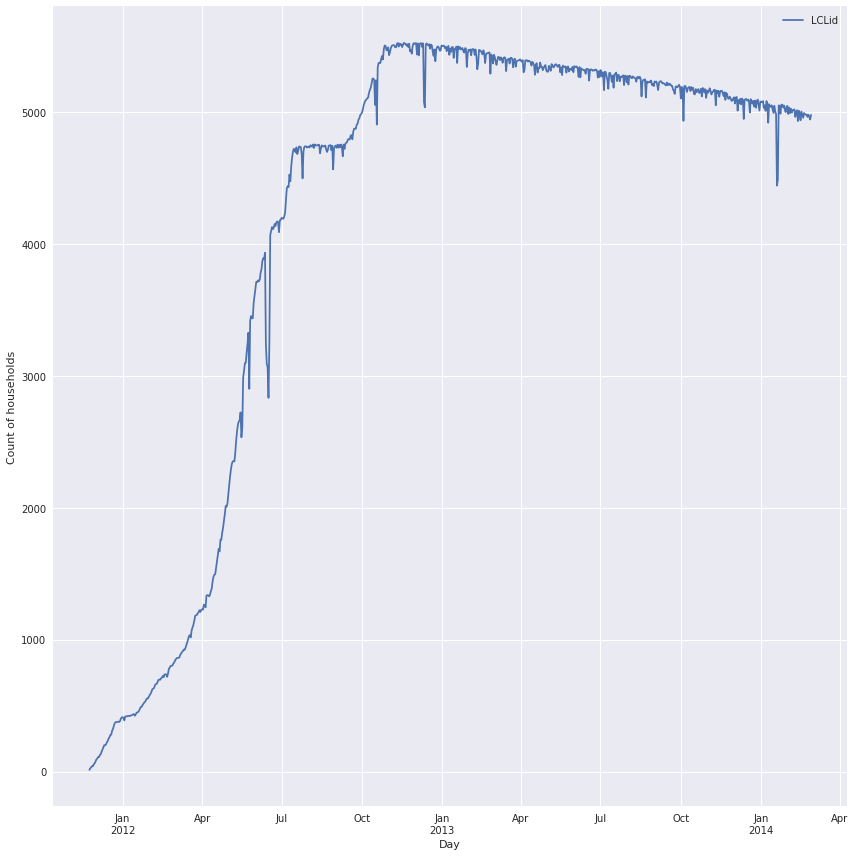

In [41]:
fig,ax=plt.subplots(figsize=(12,12))
df_count.plot(ax=ax)
plt.xlabel("Day")
plt.ylabel("Count of households")
fig.tight_layout()
plt.show()
ax.figure.savefig(folder_savepicture+"count_householdday.png")

**Notes**: The analysis of the useful for an analysis (and comparison) is optimal for the year of 2013 so we will focus our analytic on this period.

In [42]:
start_date=datetime.datetime(year=2013,month=1,day=1)
end_date=datetime.datetime(year=2014,month=1,day=1)

In [43]:
# Select the devices with enough data
df_dailyselection_zoom=df_dailyselection[(df_dailyselection["day"]>=start_date) & (df_dailyselection["day"]<end_date)]

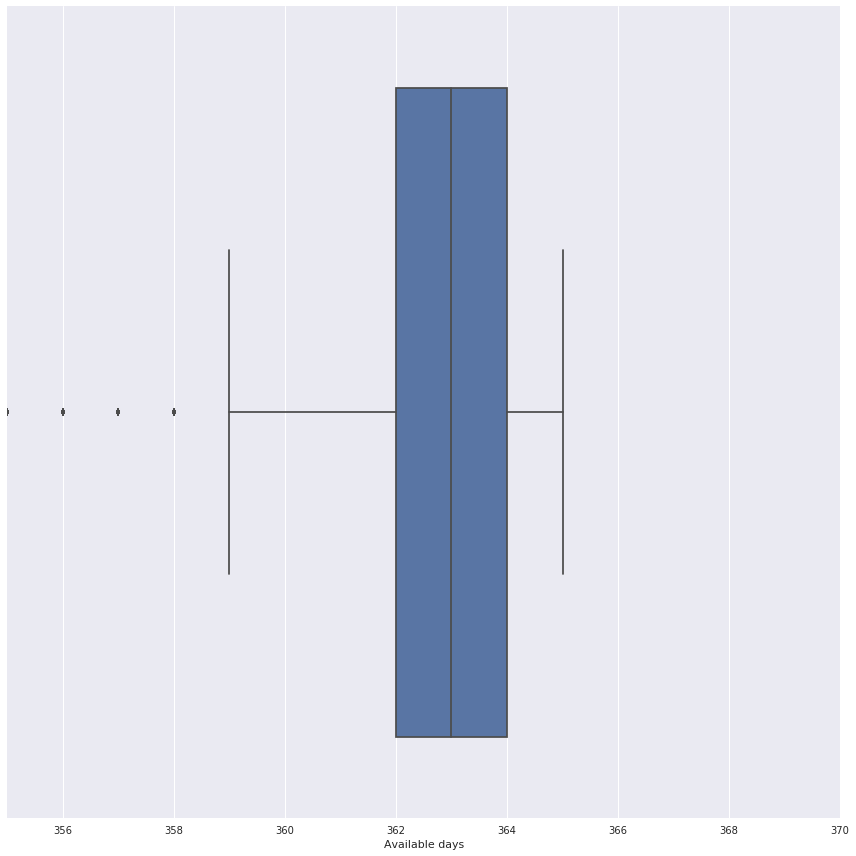

In [44]:
# Represents the number of day avaialble per device in the date range

df_countperid=df_dailyselection_zoom.groupby(["LCLid"]).count()

fig,ax=plt.subplots(figsize=(12,12))
sns.boxplot(df_countperid)
plt.xlim(355,370)
plt.xlabel("Available days")
fig.tight_layout()
plt.show()
ax.figure.savefig(folder_savepicture+"boxplot_availalbedayhousehold.png")

**Notes**: The number of day available for the devices in the time range selected is very good as you can see on the boxplot.

In [45]:
# focus on selection criterai of 360 days at least
list_devices=list(df_countperid[df_countperid>357].index)
print("Households for the rest of the study: {} households".format(len(list_devices)))

Households for the rest of the study: 5528 households


In [46]:
# Find the block file with the households
df_householddetails=pd.read_csv(folder+'informations_households.csv')
df_householddetails_selection=df_householddetails[df_householddetails["LCLid"].isin(list_devices)]
df_householddetails_selection.head()

LCLid stdorToU    Acorn Acorn_grouped     file
0  MAC005492      ToU   ACORN-        ACORN-  block_0
2  MAC000002      Std  ACORN-A      Affluent  block_0
3  MAC003613      Std  ACORN-A      Affluent  block_0
4  MAC003597      Std  ACORN-A      Affluent  block_0
5  MAC003579      Std  ACORN-A      Affluent  block_0

In [19]:
#Lost of households during the selection
print("LOST of households:",len(df_householddetails)-len(df_householddetails_selection),"households")

LOST of households: 38 households


In [20]:
# Get the general heatmap
dataset_folder="hhblock_dataset/"
pbar = tqdm(total=len(df_householddetails_selection))

list_heatmap=[]
for block in df_householddetails_selection["file"].unique():
    file="{}.csv".format(block)
    df_hhblock=pd.read_csv(folder+dataset_folder+file).dropna()
    df_hhblock["day"]=pd.to_datetime(df_hhblock["day"])
    df_hhblock=df_hhblock[(df_hhblock["day"]>=start_date) & (df_hhblock["day"]<end_date)]
    for household in df_householddetails_selection[df_householddetails_selection["file"]==block]["LCLid"].unique():
        df_hhblock_household=df_hhblock[df_hhblock["LCLid"]==household].drop(["LCLid"],axis=1)
        df_hhblock_household["day"]=df_hhblock_household.apply(lambda row:row["day"].strftime("%Y-%m-%d"),axis=1)
        if len(df_hhblock_household)>=357:
            list_heatmap.append(df_hhblock_household)
        pbar.update(1)
pbar.close()

HBox(children=(IntProgress(value=0, max=5528), HTML(value='')))

In [21]:
df_generalheatmap=pd.concat(list_heatmap,axis=0).groupby(["day"]).mean()

In [22]:
stdate=datetime.datetime.now().replace(hour=0,minute=0)
df_generalheatmap.columns=["{}-{}".format((stdate+datetime.timedelta(minutes=i*30)).strftime("%H:%M"),(stdate+datetime.timedelta(minutes=(i+1)*30)).strftime("%H:%M")) for i in range(48)]

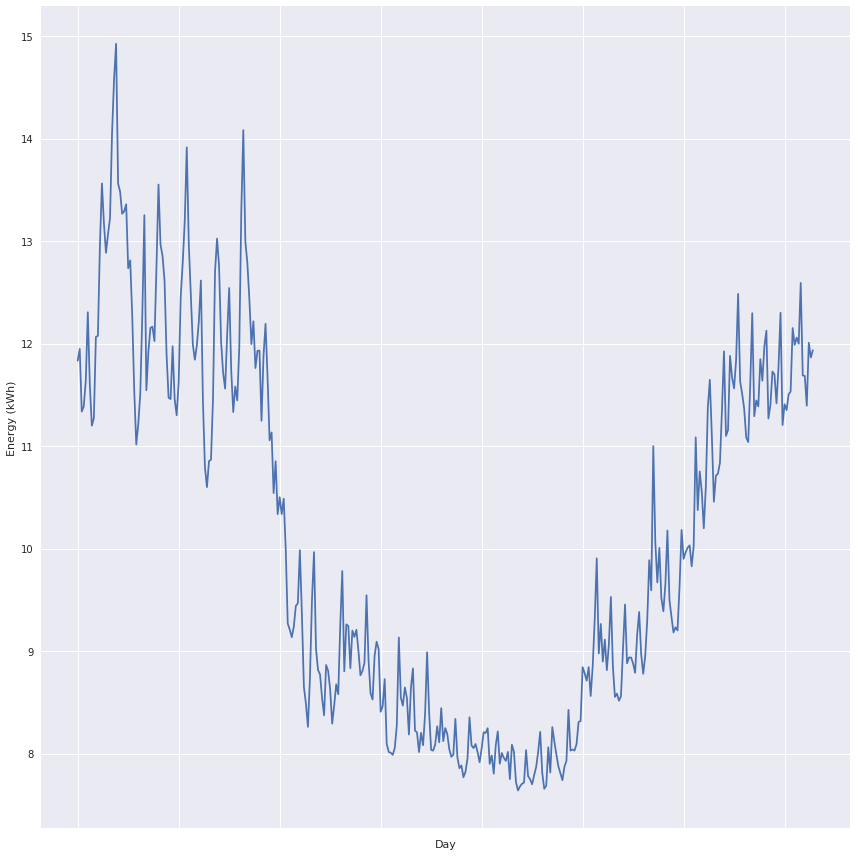

In [23]:
fig,ax=plt.subplots(figsize=(12,12))
#plot_heatmap(fig, ax,df_generalheatmap,"")
df_generalheatmap.sum(axis=1).plot(ax=ax,kind="line",use_index=True)
plt.xlabel("Day")
plt.ylabel("Energy (kWh)")
fig.tight_layout()
plt.show()
ax.figure.savefig(folder_savepicture+"timeseries_sumall.png")

In [24]:
df_weatherdaily["time"]=pd.to_datetime(df_weatherdaily["time"])
df_weatherdaily=df_weatherdaily.sort_values(["time"])
df_weatherdaily["day"]=df_weatherdaily.apply(lambda row:row["time"].strftime("%Y-%m-%d"),axis=1)
df_weatherdaily["temperatureMean"]=df_weatherdaily.apply(lambda row:(row["temperatureMax"]+row["temperatureMin"])/2,axis=1)
df_weatherdaily=df_weatherdaily.drop_duplicates(["day"])
df_weatherdaily=df_weatherdaily.set_index(("day"))
df_weatherdaily.head()

temperatureMax   temperatureMaxTime  windBearing  \
day                                                            
2011-11-01           15.57  2011-11-01 15:00:00          208   
2011-11-02           15.19  2011-11-02 23:00:00          134   
2011-11-03           17.41  2011-11-03 14:00:00          154   
2011-11-04           15.54  2011-11-04 11:00:00          179   
2011-11-05           13.94  2011-11-05 15:00:00          346   

                           icon  dewPoint   temperatureMinTime  cloudCover  \
day                                                                          
2011-11-01    partly-cloudy-day     10.13  2011-11-01 22:00:00        0.36   
2011-11-02  partly-cloudy-night     10.23  2011-11-02 03:00:00        0.39   
2011-11-03    partly-cloudy-day     13.39  2011-11-03 21:00:00        0.52   
2011-11-04                  fog     12.03  2011-11-04 23:00:00        0.50   
2011-11-05                  fog     10.96  2011-11-05 02:00:00        0.65   

            windSpeed  pressure apparentTemperatureMinTime       ...        \
day                                                              ...         
2011-11-01       2.45   1009.46        2011-11-01 22:00:00       ...         
2011-11-02       4.39   1004.79        2011-11-02 03:00:00       ...         
2011-11-03       3.99    993.40        2011-11-03 21:00:00       ...         
2011-11-04       2.62    995.54        2011-11-04 23:00:00       ...         
2011-11-05       2.70   1007.39        2011-11-05 02:00:00       ...         

                    sunriseTime  temperatureHighTime          uvIndexTime  \
day                                                                         
2011-11-01  2011-11-01 06:54:29  2011-11-01 15:00:00  2011-11-01 10:00:00   
2011-11-02  2011-11-02 06:56:16  2011-11-02 13:00:00  2011-11-02 09:00:00   
2011-11-03  2011-11-03 06:58:03  2011-11-03 14:00:00  2011-11-03 10:00:00   
2011-11-04  2011-11-04 06:59:49  2011-11-04 11:00:00  2011-11-04 10:00:00   
2011-11-05  2011-11-05 07:01:36  2011-11-05 15:00:00  2011-11-05 10:00:00   

                                      summary   temperatureLowTime  \
day                                                                  
2011-11-01       Partly cloudy until evening.  2011-11-02 03:00:00   
2011-11-02  Partly cloudy throughout the day.  2011-11-02 19:00:00   
2011-11-03  Partly cloudy throughout the day.  2011-11-04 07:00:00   
2011-11-04                   Foggy overnight.  2011-11-05 02:00:00   
2011-11-05              Foggy in the morning.  2011-11-06 05:00:00   

            apparentTemperatureMin  apparentTemperatureMaxTime  \
day                                                              
2011-11-01                    9.01         2011-11-01 15:00:00   
2011-11-02                    7.33         2011-11-02 23:00:00   
2011-11-03                   12.79         2011-11-03 14:00:00   
2011-11-04                   11.53         2011-11-04 11:00:00   
2011-11-05                   10.17         2011-11-05 15:00:00   

            apparentTemperatureLowTime moonPhase temperatureMean  
day                                                               
2011-11-01         2011-11-02 03:00:00      0.21          12.625  
2011-11-02         2011-11-02 19:00:00      0.24          12.035  
2011-11-03         2011-11-04 07:00:00      0.27          15.100  
2011-11-04         2011-11-05 02:00:00      0.31          13.535  
2011-11-05         2011-11-06 06:00:00      0.34          12.055  

[5 rows x 33 columns]

In [25]:
df_glob=pd.concat([df_generalheatmap.sum(axis=1),df_weatherdaily["temperatureMean"]],axis=1).dropna()
df_glob.columns=["total_consumption","average_outdoortemperature"]
df_glob.head()

total_consumption  average_outdoortemperature
2013-01-01          11.832464                       5.400
2013-01-02          11.947462                       7.065
2013-01-03          11.335781                      10.530
2013-01-04          11.386660                       9.480
2013-01-05          11.637469                       9.250

In [145]:
import numpy as np
import scipy
from sklearn.cross_validation import train_test_split
from sklearn.metrics import explained_variance_score, r2_score,mean_absolute_error
from sklearn.model_selection import KFold


def ptg_model(x, a, b, x0):
    return np.piecewise(x, [x < x0, x >= x0], [lambda x: a*x+b , lambda x:a*x0+b])

def get_model_ptg(x,y):
    x0_min = -5
    x0_max = 30
    a_min=-5
    a_max=5
    b_min=0
    b_max=200
    bounds_min = [a_min, b_min, x0_min]
    bounds_max = [a_max, b_max, x0_max]
    bounds = (bounds_min, bounds_max)
    popt, pcov = scipy.optimize.curve_fit(ptg_model, x, y, bounds=bounds)
    a= popt[0]
    b = popt[1]
    x0 = popt[2]
    return a,b,x0


def get_bestptgmodel(X_train, X_test, y_train, y_test,kf):
    r2score_ref=-1*np.inf
    executiontime_ref=0
    best_model={}
    for train_index, validation_index in kf.split(X_train):
        X_training, X_validation = X_train[train_index], X_train[validation_index]
        y_training, y_validation = y_train[train_index], y_train[validation_index]

        model=get_model_ptg(X_training,y_training)
        y_pred=[]
        for value in X_validation:
            y_pred.append(ptg_model(value,model[0],model[1],model[2]))

        #print(r2_score(y_validation, y_pred),mean_absolute_error(y_validation, y_pred))

        score=r2_score(y_validation, y_pred)
        if score>r2score_ref:
            r2score_ref=score
            best_model=model
            #print("Best model:",r2score_ref,toc)

    
    # Test the best model in the testing set
    y_pred=[]
    for value in X_test:
        y_pred.append(ptg_model(value,best_model[0],best_model[1],best_model[2]))
        
    r2score_test=r2_score(y_test, y_pred)
    meanabserror_test= mean_absolute_error(y_test, y_pred)
    #print("Final results:",r2score_test,meanabserror_test,executiontime_ref)  
    return best_model,r2score_test,meanabserror_test,executiontime_ref

In [146]:
kf = KFold(n_splits=10)
X_train, X_test, y_train, y_test = train_test_split(np.array(df_glob["average_outdoortemperature"]),np.array(df_glob["total_consumption"]),test_size=0.2,random_state=42)
best_model_general,r2score_test,meanabserror_test,executiontime_ref=get_bestptgmodel(X_train, X_test, y_train, y_test,kf)

In [147]:
print(r2score_test,best_model_general)

0.842771939049 (-0.30037727746145937, 13.209612684289773, 17.419195176907941)


In [148]:
new_x = np.linspace(df_weatherdaily["temperatureMean"].min(), df_weatherdaily["temperatureMean"].max(), 100)

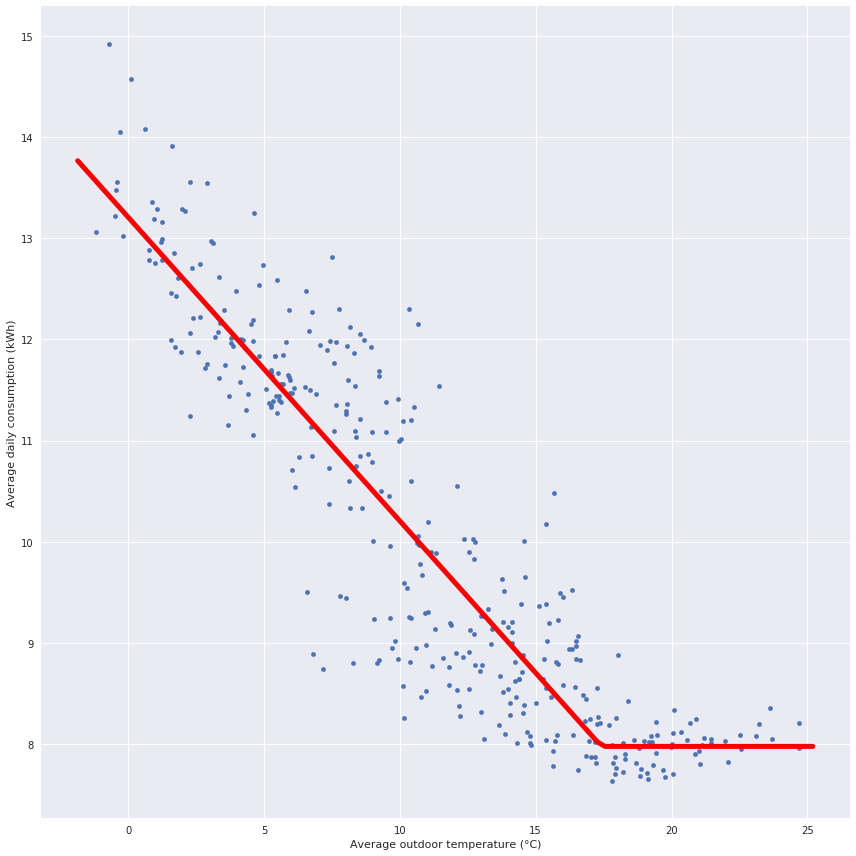

In [149]:
fig,ax=plt.subplots(figsize=(12,12))
#plot_heatmap(fig, ax,df_generalheatmap,"")
df_glob.plot(ax=ax,x="average_outdoortemperature",y="total_consumption",kind="scatter")
ax.plot(new_x,ptg_model(new_x, best_model_general[0], best_model_general[1], best_model_general[2]),color="#F60000",linewidth=5.0,label="PTG model")

plt.ylabel("Average daily consumption (kWh)")
plt.xlabel("Average outdoor temperature (°C)")
fig.tight_layout()
plt.show()
ax.figure.savefig(folder_savepicture+"ptg_like.png")

In [150]:
def get_season(date):
    seasons = {2:(datetime.datetime(date.year,6,21), datetime.datetime(date.year,9,22)),
           3:(datetime.datetime(date.year,9,23), datetime.datetime(date.year,12,20)),
           1:(datetime.datetime(date.year,3,21), datetime.datetime(date.year,6,20))}
    for season,(season_start, season_end) in seasons.items():
        if date>=season_start and date<= season_end:
            return season
    else:
        return 0

In [151]:
nbr_rows=4

dataset_folder="daily_dataset/"

pbar = tqdm(total=len(df_householddetails_selection))

list_elt=[]
for block in df_householddetails_selection["file"].unique():
    file="{}.csv".format(block)
    df_dailyblock=pd.read_csv(folder+dataset_folder+file).dropna()
    df_dailyblock["day"]=pd.to_datetime(df_dailyblock["day"])
    #print(df_dailyblock.head())
    df_dailyblock=df_dailyblock[(df_dailyblock["day"]>=start_date) & (df_dailyblock["day"]<end_date)]
    df_dailyblock["day"]=df_dailyblock.apply(lambda row:row["day"].strftime("%Y-%m-%d"),axis=1)

    for household in df_householddetails_selection[df_householddetails_selection["file"]==block]["LCLid"].unique():
        df_daily_household=df_dailyblock[df_dailyblock["LCLid"]==household].drop(["LCLid"],axis=1)
        df_daily_household=df_daily_household[df_daily_household["energy_count"]>47][["day","energy_sum"]].set_index(["day"])
        df_glob_household=pd.concat([df_daily_household,df_weatherdaily["temperatureMean"]],axis=1).dropna()
        df_glob_household.columns=["total_consumption","average_outdoortemperature"]
        if len(df_glob_household)>357:
            X_train, X_test, y_train, y_test = train_test_split(np.array(df_glob_household["average_outdoortemperature"]),np.array(df_glob_household["total_consumption"]),test_size=0.2,random_state=42)
            try:
                best_model,r2score_test,meanabserror_test,executiontime_ref=get_bestptgmodel(X_train, X_test, y_train, y_test,kf)
                #print(household,best_model,r2score_test)
                test_df=df_glob_household.reset_index()
                test_df["index"]=pd.to_datetime(test_df["index"])
                test_df["season"]=test_df.apply(lambda row:get_season(row["index"]),axis=1)

                mean_consumption_season=test_df.groupby(["season"]).mean()["total_consumption"]
                
                dict_household={
                    "LCLid":household,
                    "model_a":best_model[0],
                    "model_b":best_model[1],
                    "model_x0":best_model[2],
                    "r2score":r2score_test,
                    "data":df_glob_household
                }
                for i,row in enumerate(mean_consumption_season.transpose()):
                    dict_household["season_{}".format(i)]=row
                
                
                
                list_elt.append(dict_household)
            except:
                continue
            

        pbar.update(1)
        
pbar.close()

HBox(children=(IntProgress(value=0, max=5528), HTML(value='')))

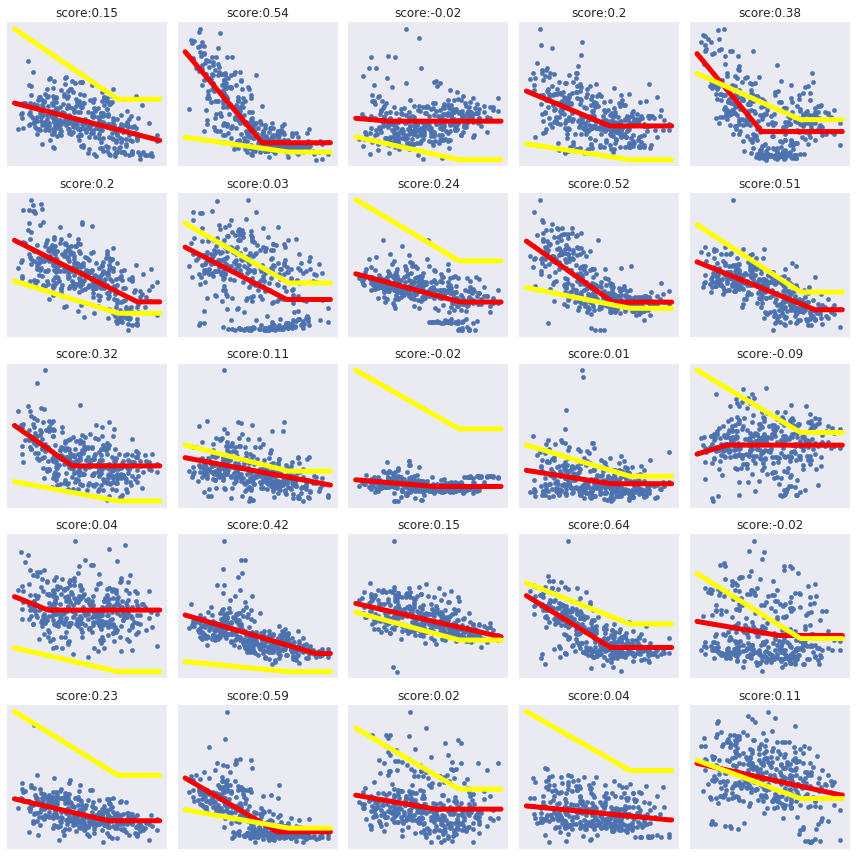

In [152]:
import random
nbr_rows=5

fig, ax = plt.subplots(figsize=(12,12),nrows=nbr_rows, ncols=nbr_rows)
count_plot=1
for household in random.sample(list_elt,nbr_rows*nbr_rows):
    ax=plt.subplot(nbr_rows, nbr_rows, count_plot)
    household["data"].plot(ax=ax,x="average_outdoortemperature",y="total_consumption",kind="scatter")
    ax.plot(new_x,ptg_model(new_x, household["model_a"], household["model_b"], household["model_x0"]),color="#F60000",linewidth=5.0,label="PTG model")
    ax.plot(new_x,ptg_model(new_x, best_model_general[0], best_model_general[1], best_model_general[2]),color="#FFFF00",linewidth=5.0,label="PTG model general")

    
    
    ax.set_title("score:"+str(round(household["r2score"],2)))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    count_plot+=1
fig.tight_layout()
plt.show()
ax.figure.savefig(folder_savepicture+"ptg_randomhouseholds.png")

In [153]:
def without_keys(d, keys):
    return {x: d[x] for x in d if x not in keys}

def get_ratio_wintersummer(winter,summer):
    
    if summer==0:
        return np.nan
    else:
        return winter/summer

In [154]:
df_generalptg_season=pd.DataFrame([without_keys(elt,["data"]) for elt in list_elt])
df_generalptg_season["ratio_winter_summer"]=df_generalptg_season.apply(lambda row: get_ratio_wintersummer(row["season_0"],row["season_2"]),axis=1)
df_generalptg_season=df_generalptg_season.dropna().set_index(["LCLid"])
df_generalptg_season.head()

model_a    model_b   model_x0   r2score   season_0   season_1  \
LCLid                                                                       
MAC000002 -0.249034  14.312300  20.097587  0.134686  13.677956  10.605000   
MAC003613 -1.092507  43.440572  22.085071  0.267425  36.588534  26.973424   
MAC003597 -0.662309  32.146694  10.755003  0.150920  34.145112  20.776424   
MAC003579 -0.711545  11.449181   0.775001 -0.026575  10.437778  10.387946   
MAC003566 -0.920591  38.661816  23.976802  0.450428  35.612078  30.115187   

            season_2   season_3  ratio_winter_summer  
LCLid                                                 
MAC000002   9.082032  13.002841             1.506046  
MAC003613  22.243011  41.180080             1.644945  
MAC003597  26.283840  27.054216             1.299091  
MAC003579  11.527915  10.969330             0.905435  
MAC003566  20.887606  28.990409             1.704938

In [155]:
df_crossdata=pd.concat([df_generalptg_season,df_householddetails.set_index(["LCLid"])],axis=1).dropna().drop(["file"],axis=1)
df_crossdata=df_crossdata[(df_crossdata["r2score"]>-1) & (df_crossdata["ratio_winter_summer"]<10) & (df_crossdata["ratio_winter_summer"]>-10)]
df_crossdata.head()

model_a    model_b   model_x0   r2score   season_0   season_1  \
MAC000002 -0.249034  14.312300  20.097587  0.134686  13.677956  10.605000   
MAC000003 -2.590097  40.789027  11.222564  0.315249  33.283000  17.459778   
MAC000004 -0.018258   1.882829  26.013863  0.100642   1.886944   1.727923   
MAC000005 -0.134637   5.904149  17.596062  0.243049   5.593722   3.852077   
MAC000006 -0.079922   3.722881  18.980002  0.094900   3.298278   2.868098   

            season_2   season_3  ratio_winter_summer stdorToU    Acorn  \
MAC000002   9.082032  13.002841             1.506046      Std  ACORN-A   
MAC000003  11.807021  14.316886             2.818916      Std  ACORN-P   
MAC000004   1.475000   1.695057             1.279284      Std  ACORN-E   
MAC000005   3.713745   5.002614             1.506222      ToU  ACORN-C   
MAC000006   2.257532   3.158591             1.461010      Std  ACORN-Q   

          Acorn_grouped  
MAC000002      Affluent  
MAC000003     Adversity  
MAC000004      Affluent  
MAC000005      Affluent  
MAC000006     Adversity

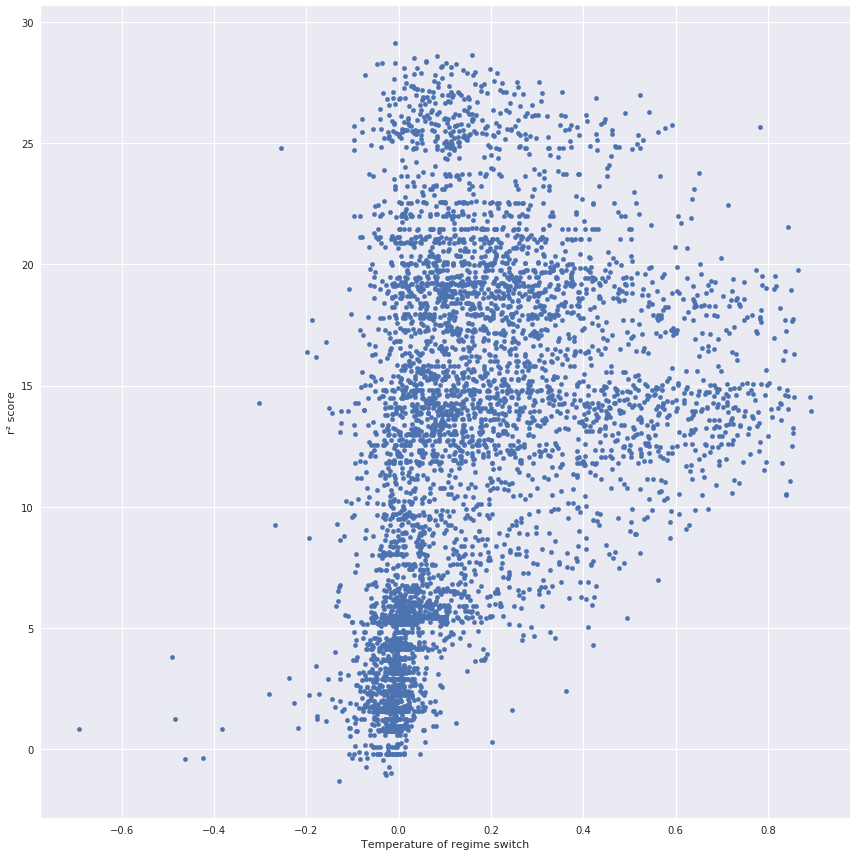

In [173]:
fig,ax=plt.subplots(figsize=(12,12))

df_crossdata.plot(ax=ax,x="r2score",y="model_x0",kind="scatter")
#ax.plot(new_x,ptg_model(new_x, best_model_general[0], best_model_general[1], best_model_general[2]),color="#F60000",linewidth=5.0,label="PTG model")

plt.ylabel("r² score")
plt.xlabel("Temperature of regime switch")
fig.tight_layout()
plt.show()
ax.figure.savefig(folder_savepicture+"ptg_result.png")

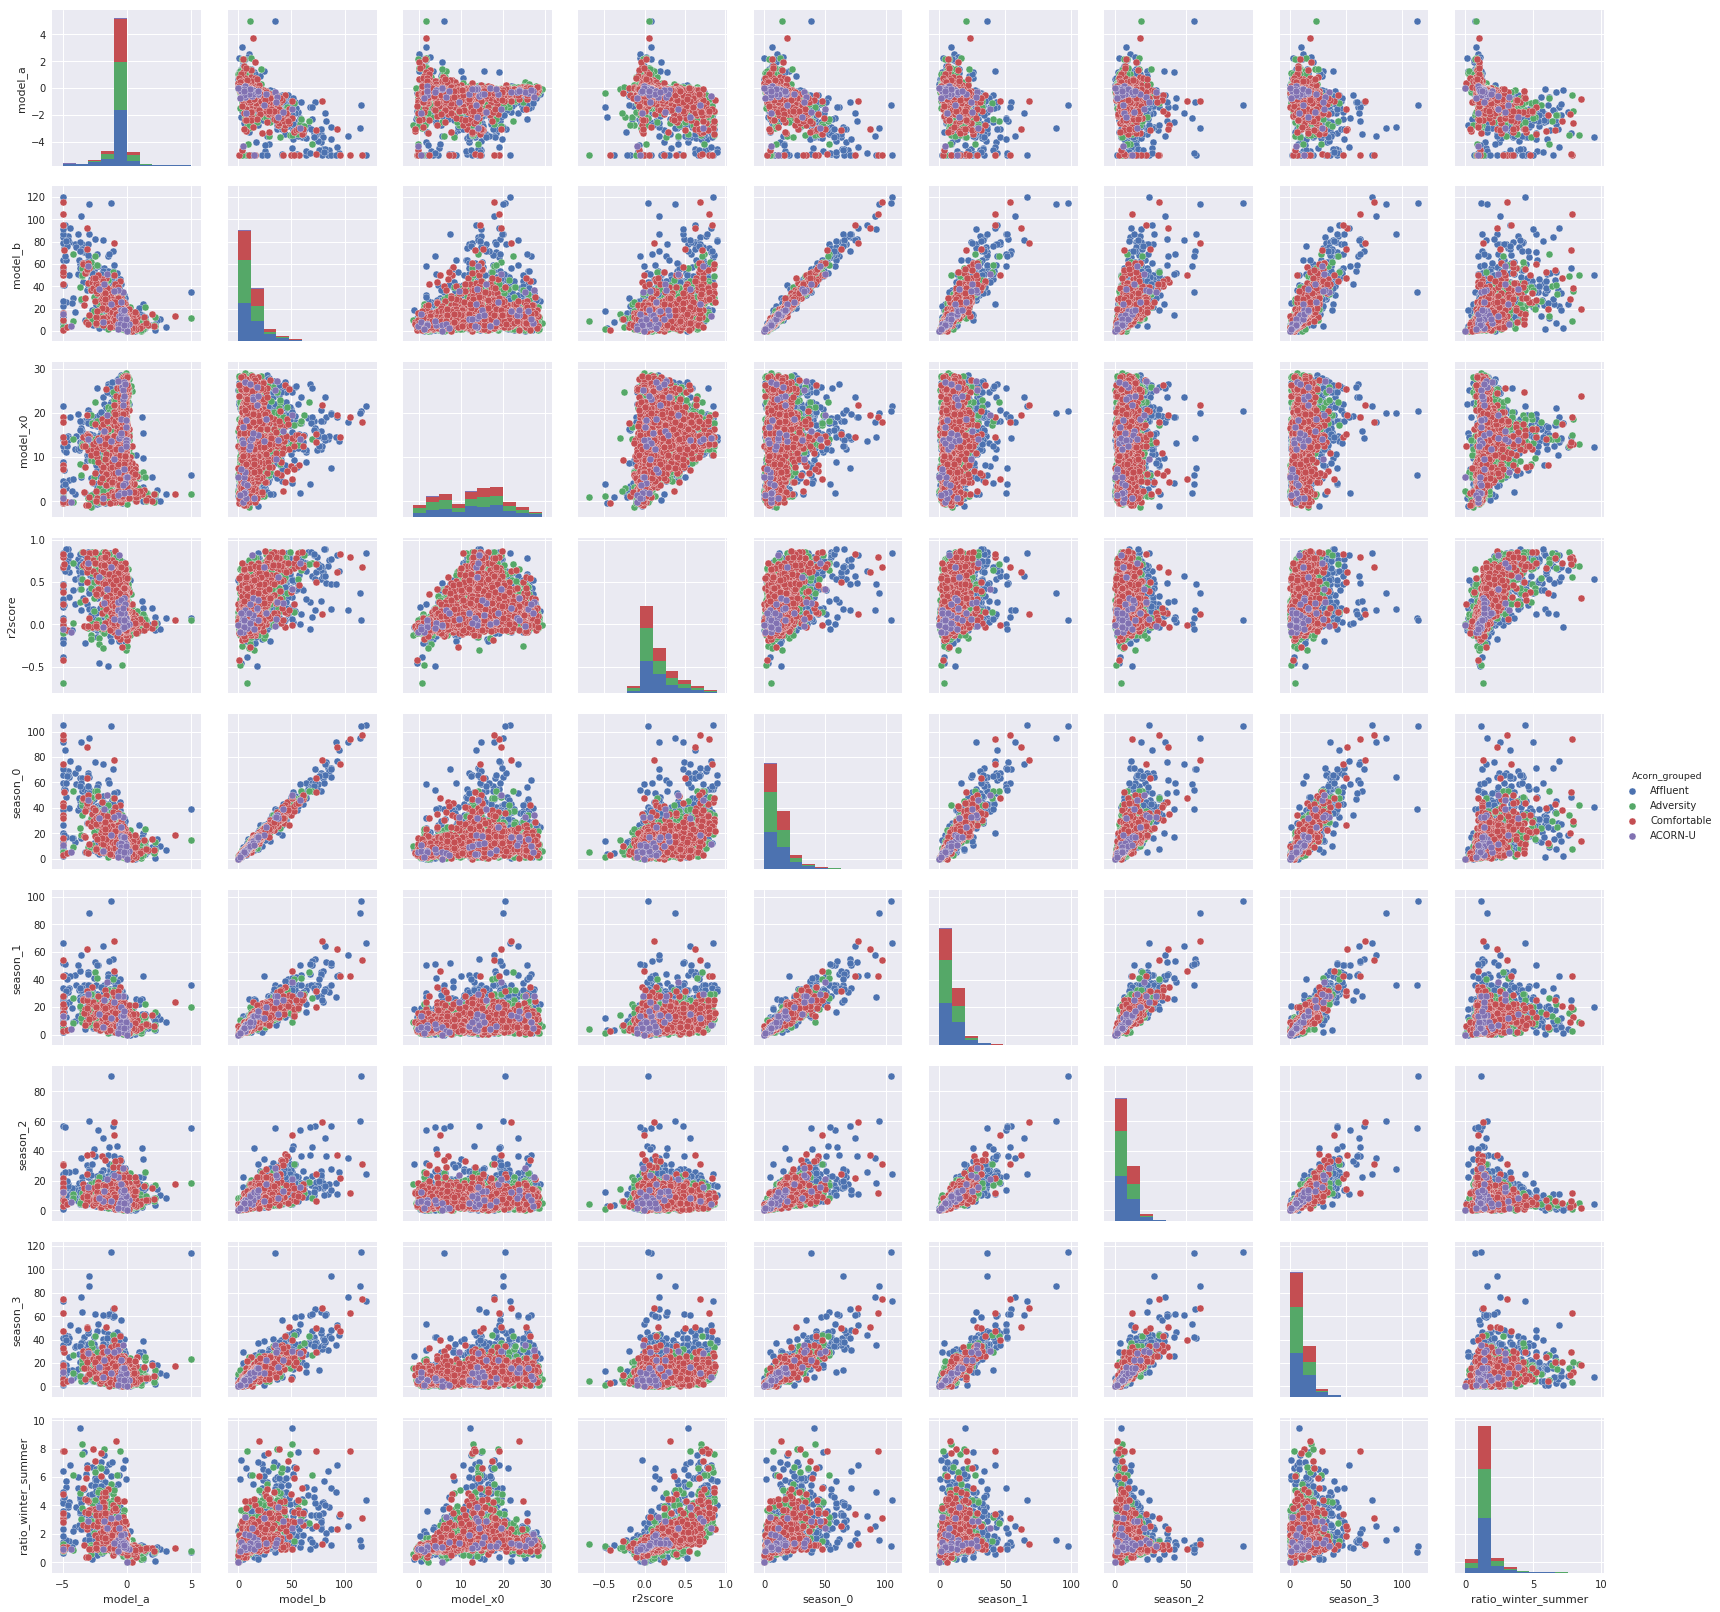

In [157]:
plt.rcParams['figure.figsize']=(9,9)
sns_plot=sns.pairplot(df_crossdata, hue="Acorn_grouped")

sns_plot.savefig(folder_savepicture+"pairplot_dfcross.png")

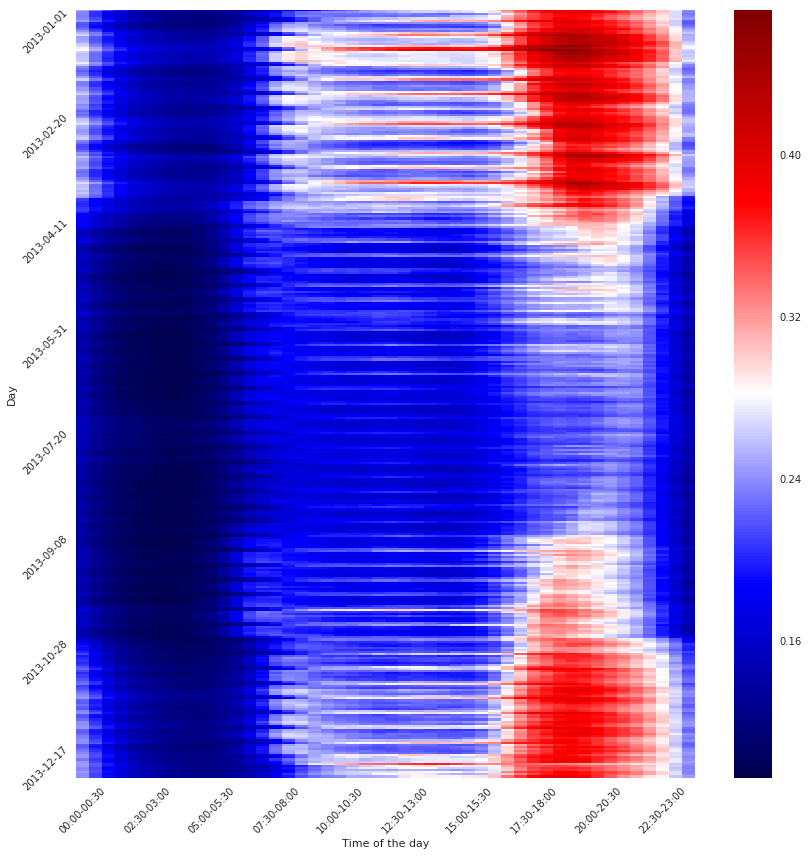

In [158]:
fig,ax=plt.subplots(figsize=(12,12))
#plot_heatmap(fig, ax,df_generalheatmap,"")
sns.heatmap(df_generalheatmap,cmap='seismic',xticklabels = 5, yticklabels = 50)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.ylabel("Day")
plt.xlabel("Time of the day")
fig.tight_layout()
plt.show()
ax.figure.savefig(folder_savepicture+"heatmap.png")